# 基本操作
上個章節我們並沒有深入講解`numpy`跟`matplotlib`的操作。這個章節我們就稍微提一些常用功能。首先，numpy是個用C語言寫成的函式庫，支援多維度陣列(N-Dimensional Array)。首先我們就來看看要如何令一個陣列。
## 變數指定 Assignments

In [1]:
import numpy as np
arr = np.array([[1, 2], [3, 4], [5, 6]])
arr

array([[1, 2],
       [3, 4],
       [5, 6]])

這就是一個一維陣列，要注意的是，numpy的陣列是不能修改長度的，而且每個數值都必須是相同的型別(type)。這一點跟python內建的`list`很不一樣。這格特性是源自於C/C++的陣列的用法。  
numpy的陣列有幾個重要的attribute(屬性)
* ndim: number of dimensions；維度
* shape: shape of ndarray；每個維度的長度
* dtype: underlying data type of each element；每個資料的型別
* size: number of elements；有幾筆資料，shape所有長度的乘積

In [2]:
print(type(arr))
print('arr dimension:', arr.ndim)
print('arr shape:', arr.shape)
print('arr element data type:', arr.dtype)
print('arr number of elements:', arr.size)

<class 'numpy.ndarray'>
arr dimension: 2
arr shape: (3, 2)
arr element data type: int64
arr number of elements: 6


### 科學常數
numpy內建許多科學常數，比如最常見的($\pi$)、數值無限($\infty$)、非數值(Not a Number, NaN)都有明確定義。他跟python內建的`math`模組所定義的常數是可以互換的。那位什麼不用math就好？因為這樣能少一個import很方便。

In [3]:
import math
print(np.inf == math.inf)

True


### 陣列、矩陣、高維度陣列 Arrays, Matrices, and ndarrays
除了前面提到可以利用`numpy.array`來建立自己想要的陣列。numpy也提供其他函式方便我們建立一些常用的矩陣。以下列舉一些常用的：

`zeros`: 零矩陣，通常表示為$O$

In [26]:
np.zeros((3, 2))

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

`ones`: 一矩陣，全部都是一的矩陣

In [27]:
np.ones((3, 2))

array([[1., 1.],
       [1., 1.],
       [1., 1.]])

`empty`: 空矩陣。沒有初始值的記憶體區塊。寫C的可以把他理解為`malloc`，C++可以把他當作是`new[]`。因為沒有定義初始值，所以一開始記憶體內的數值便是亂碼。empty最大的用處是先配一塊記憶體，再用for迴圈將值寫進去。(從C/C++/Java來的應該很熟悉這種操作）

In [28]:
np.empty((2, 4))

array([[4.66017529e-310, 0.00000000e+000, 3.29673704e+180,
        7.19026821e+252],
       [3.07941658e+175, 1.21906099e-152, 6.09249078e+247,
        4.95264277e+223]])

`identity`: 單位矩陣。diagonal為1其餘為0的方陣，通常表示為$I$

In [30]:
np.identity(3) # can only be square matrix

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

### 序列生成 Sequence Generation
除了上述矩陣之外，我們有時候也會需要產生一組序列，方便我們迭代或取值。`numpy.arrange`就是這個功能。他跟python內建`range`的差異就是`numpy.arrange`產生的是`numpy.ndarray`所以比較方便操作。此外python range 產生的是generator而不是list，所以如果要得到list還要自己unpack。

In [5]:
py_range = [i for i in range(1, 6)]
print(py_range, type(py_range))
np_arange = np.arange(1, 6, step=1)
print(np_arange, type(np_arange))

[1, 2, 3, 4, 5] <class 'list'>
[1 2 3 4 5] <class 'numpy.ndarray'>


此外numpy跟matlab一樣也有`linspace`跟`logspace`。這兩個基本上就是幫你產生線性的座標點，或是對數的座標點，在繪圖的時候很方便。

In [31]:
np.linspace(1, 6, 5)

array([1.  , 2.25, 3.5 , 4.75, 6.  ])

In [32]:
np.logspace(1, 6, 5)

array([1.00000000e+01, 1.77827941e+02, 3.16227766e+03, 5.62341325e+04,
       1.00000000e+06])

> 你可以調整`numpy.arange`跟`numpy.linspace`的第三個參數觀察他們的不同之處。arange的第三個參數是*點到點之間的間隔*，而linspace則是*從頭到尾必須分割出多少點*

## 數學運算 Mathematical operations
numpy.ndarray支援所有python的數學運算。也就是加減乘除跟次方(a**2)。當然，bitwise operatrion 如且(&)、或(|)、非(~)以及XOR(^)也都是支援的。

In [36]:
a = np.arange(1, 6)
b = np.ones(5)
print(a * 0.2 + b)

[1.2 1.4 1.6 1.8 2. ]


In [37]:
a**2

array([ 1,  4,  9, 16, 25])

跟python內建的數字做四則運算也是OK的

In [38]:
b * 3 # works with scalars too

array([3., 3., 3., 3., 3.])

此外我們最在乎的當然不是上面那些一對一的運算，而是矩陣運算。numpy也有提供矩陣法。以下顯示內積的作法：

In [39]:
x = np.array([0.1, 0.9]) # vector

A = np.array([[0.1, 0.6], # matrix
              [0.9, 0.4]])

# all three statements are equivilent
x1 = A @ x
# x1 = A.dot(x)
# x1 = np.dot(A, x)
print(x1)

[0.55 0.45]


## Numpy 通用函式 Numpy Universal Functions
除了四則運算其他函式也不可少。numpy當然應有盡有。這些函式`math`模組也有，但是math的函式不能用在ndarray上，但numpy的通用函式可以用在python內建型別，所以能用numpy就用numpy。工程上常見的就是下面幾種：
指數與對數：exponential指數 [`np.exp(x)`](https://numpy.org/doc/stable/reference/generated/numpy.exp.html), 自然對數 [`np.log(x)`](https://numpy.org/doc/stable/reference/generated/numpy.log.html), 以10為底的對數 $log_{10}(x)$ [`np.log10(x)`](https://numpy.org/doc/stable/reference/generated/numpy.log10.html)

In [41]:
# numpy works with both scalar and ndarrays!
arr = np.ones((3, 2))
print(np.exp(1))
print(np.exp(arr))
# print(math.exp(arr)) # TypeError, math only works with scalars

2.718281828459045
[[2.71828183 2.71828183]
 [2.71828183 2.71828183]
 [2.71828183 2.71828183]]


三角函數系列：包含一般三角函數 [`np.sin`](https://numpy.org/doc/stable/reference/generated/numpy.sin.html), [`np.cos`](https://numpy.org/doc/stable/reference/generated/numpy.cos.html); hyperbolic三角函數 [`np.sinh`](https://numpy.org/doc/stable/reference/generated/numpy.sinh.html), [`np.cosh`](https://numpy.org/doc/stable/reference/generated/numpy.cosh.html); 反函數 [`np.arcsin`](https://numpy.org/doc/stable/reference/generated/numpy.arcsin.html)。三角函數相關的參數都是以徑度(radians)為單位。所以numpy也提供了一些函數幫你簡易轉換。[`np.deg2rad`](https://numpy.org/doc/stable/reference/generated/numpy.deg2rad.html) 從角度(degrees)轉成徑度(radians)，反之 [`np.rad2deg`](https://numpy.org/doc/stable/reference/generated/numpy.rad2deg.html) 就是徑度轉成角度。
> deg2rad 讀作 *degrees-to-radians*，讀成 *deg二rad* 就low 掉了。

有方向性的三角函數：例如 [`np.arctan2`](https://numpy.org/doc/stable/reference/generated/numpy.arctan2.html) 也蠻重要的。

In [45]:
print(np.sin(np.pi/2)) # 90 degrees
print(f'pi/4 {np.rad2deg(np.pi/4)} degrees')
print('arctan(1) is', np.rad2deg(np.arctan(1)), 'degrees')

1.0
pi/4 45.0 degrees
arctan(1) is 45.0 degrees


有方向性的三角函數：例如 [`np.arctan2`](https://numpy.org/doc/stable/reference/generated/numpy.arctan2.html) 也蠻重要的。因為第二跟第四象限、或是第一跟第三象限的三角函數值是正負號是相同的。所以有時候把分子(numerator)跟分母(denominator)拆開才會獲得正確的結果。

In [52]:
# np.arctan2(y, x)
print(np.rad2deg(np.arctan2(1, -1))) # 2nd quadrant (x-, y+)
print(np.rad2deg(np.arctan2(-1, 1))) # 4th quadrant (x+, y-)

135.0
-45.0


進位、捨去：無條件捨去 [`np.floor(x)`](https://numpy.org/doc/stable/reference/generated/numpy.floor.html), 無條件進位 [`np.ceil(x)`](https://numpy.org/doc/stable/reference/generated/numpy.ceil.html), 四捨六入五雙數 [`np.around(x)`](https://numpy.org/doc/stable/reference/generated/numpy.around.html)

In [46]:
# rounding
arr = np.full((3, 2), 1.275)
# print(np.floor(arr))
# print(np.ceil(arr))
print(np.around(arr, decimals=2))

[[1.27 1.27]
 [1.27 1.27]
 [1.27 1.27]]


Reducing Function：可以縮減維度的函式。比如說 [`np.sum`](https://numpy.org/doc/stable/reference/generated/numpy.sum.html)可以用以下的數學式表示
$$
\textbf{v} = {\sum_{\forall i} \textbf{A}_{ij}}
$$
根據上面的式子可以觀察到我們不僅可以把向量加總成單一數值，也可以把根據不同的方向降維。在numpy裡方向被稱為axis。

In [55]:
A = np.array([[1, 2],
              [3, 4],
              [5, 6]])
print(np.sum(A)) # axis defaults to -1, which means "all elements"
print(np.sum(A, axis=0)) # sum in the row direction
print(np.sum(A, axis=1)) # sum in the column direction

21
[ 9 12]
[ 3  7 11]


當然不只加總，我們也可以用[`np.prod`](https://numpy.org/doc/stable/reference/generated/numpy.prod.html)表示連乘
$$
\textbf{v} = {\prod_{\forall i} \textbf{A}_{ij}}
$$

In [57]:
print(np.prod(A)) # equivilent to `6!`
print(np.prod(A, axis=0))
print(np.prod(A, axis=1))

720
[15 48]
[ 2 12 30]


當然比大小也OK。

In [58]:
print(np.amax(A, axis=0))
print(np.amin(A, axis=1))

[5 6]
[1 3 5]


## 繪圖 Graphics
不是每個人都對數字這麼直覺，所以有時候繪圖比較容易理解某些問題。科學相關的繪圖都是用x,y座標點相連來產生圖像。雖然很便利，點越多畫的圖就越精準。
繪圖的大致流程通常是：
1. 產生 x 座標
2. 帶入函數 $y=f(x)$ 得到所有的y座標
3. 繪製
4. 修改畫面設定

numpy本身只是拿來運算的，所以這裡我們要用`matplotlib`來進行繪圖。

舉上個章節的解析解為例：
$$
v(t)=\sqrt {{gm} \over c_d} \tanh (\sqrt{{gc_d}\over m}t)
$$
已知的東西可以先設定常數，$g=9.81$、$m=72$、$c_d=0.25$

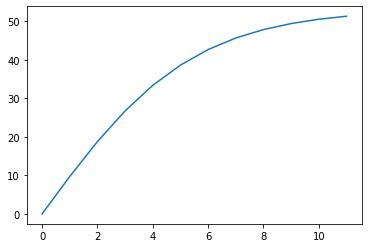

In [66]:
import matplotlib.pyplot as plt

g = 9.81
m = 72
cd = 0.25

# step 1
t = np.arange(0, 12, 1)
# step 2
v = np.sqrt(g*m/cd) * np.tanh(np.sqrt(g*cd/m) * t)
# step 3
plt.plot(t, v)
plt.show()

et Voila! 圖就出來了！當然這樣的圖別人也不清楚你畫的是什麼，所以通常我們可以佳一些註解。比如說標題title、x軸的單位、y軸的單位等等。
> 你可以改改`t`最後面的參數step，看看圖會有什麼變化

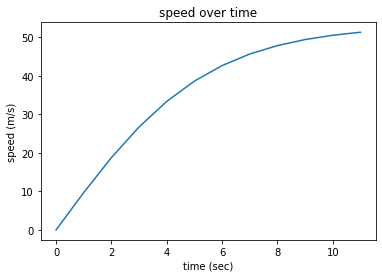

In [64]:
plt.plot(t, v)
plt.title('speed over time')
plt.xlabel('time (sec)')
plt.ylabel('speed (m/s)')

plt.show()

## 小結
這個章節我們提到`numpy`跟`maplotlib`最基礎的操作。有了運算跟繪圖我們已經可以做很多事了。